In [ ]:
'''
    Hierarchical Clustering -->

    Hierarchical clustering is a method of cluster analysis that seeks to build
    a hierarchy of clusters. It is widely used in data mining and statistics
    to group objects based on their similarities.
    
    This approach can be divided into two main types -->
    
    #   Agglomerative Hierarchical Clustering (Bottom-Up Approach) -->
    
        Starts with each data point as its own cluster.
        Gradually merges the closest clusters step by step until all points belong to a single cluster.
        Commonly visualized using a dendrogram
        
    #   Divisive Hierarchical Clustering (Top-Down Approach) -->
        
        Starts with all data points in a single cluster.
        Splits the cluster into smaller clusters recursively.
        Continues until each data point is in its own cluster or a stopping criterion is met.
'''

<img src='Source/Clustering.png' alt='Clustering' style="width:500px; height:auto; margin-left:40px;">

In [ ]:
'''
    Steps (Agglomerative HC) ->
        
    Compute the distance (or similarity) matrix for all pairs of points.
    Identify the two closest clusters and merge them.
    Recompute the distance matrix considering the newly formed cluster.
    Repeat steps 2 and 3 until only one cluster remains.
        
    Linkage Criteria ->
      
    Single Linkage: Minimum distance between points in two clusters.
    Complete Linkage: Maximum distance between points in two clusters.
    Average Linkage: Average distance between points in two clusters.
    Centroid Linkage: Distance between centroids of two clusters.
'''

In [ ]:
'''
    Advantages -->
    
    Does not require specifying the number of clusters in advance.
    Can produce a dendrogram that visually represents the data's structure.
    Suitable for small to medium-sized datasets.

    Disadvantages -->
    
    Computationally expensive for large datasets (time complexity: O(n^3)).
    Sensitive to noise and outliers.
    Requires careful selection of linkage criteria and distance metric.
    
    Applications -->
    
    Biology: Grouping species or genes with similar characteristics.
    Market Segmentation: Grouping customers with similar buying patterns.
    Image Analysis: Identifying similar regions in an image.
'''

In [ ]:
'''
    Dendogram -->
    
    A dendrogram is a tree-like diagram used to represent the arrangement of clusters
    formed through hierarchical clustering. It visually shows the steps in which clusters
    are merged or split. Each branch of the tree represents a cluster, and the height
    at which two branches merge indicates the distance or dissimilarity between the clusters.
    
    Parts of a Dendrogram -->
    
    Leaves (Bottom): Represent individual data points or initial clusters.
    Branches (Middle): Show how clusters are merged at each step.
    Height (Vertical Axis): Indicates the distance (or dissimilarity) between clusters when they are merged.
    Horizontal Axis: Represents the data points or their order.
    
    How to Interpret a Dendrogram -->
    
    Horizontal lines: Represent cluster merging.
    The height of these lines shows the distance or dissimilarity at which clusters are joined.
    Vertical lines: Connect data points or clusters to the merging step.
    Cut the dendrogram: To determine the clusters, draw a horizontal line across the dendrogram.
    The number of vertical lines intersected gives the number of clusters.
'''

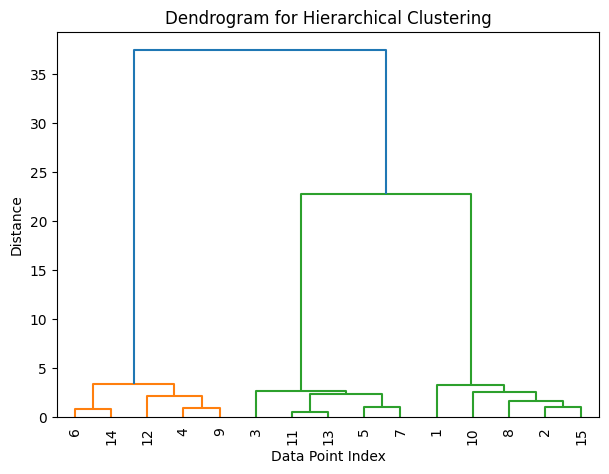

In [1]:
#   Dendogram -->

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=15, centers=3, random_state=42)

# Perform hierarchical clustering
linked = linkage(X, method='ward')

# Plot dendrogram with a width of 500px
plt.figure(figsize=(7, 5))  # Width: 5 inches, Height: 3 inches
dendrogram(linked, 
           labels=np.arange(1, len(X)+1), 
           leaf_rotation=90, 
           leaf_font_size=10)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
'''
    Visual inspection of dendrogram to find optimal clusters -->
    
    Step 1: Create a dendrogram using hierarchical clustering.
    Step 2: Observe the vertical lines (linkages) that connect clusters.
    Step 3: Identify the longest vertical line (largest distance)
    that you can "cut" without crossing more than one horizontal line.
    Step 4: Draw a horizontal line across the dendrogram where this longest
    vertical line exists. The number of vertical lines (clusters) that the
    horizontal line intersects indicates the number of clusters.
'''

<img src='Source/Optimal-Clusters.png' alt='Optimal Clusters' style="width:500px; height:auto; margin-left:40px;">

In [8]:
#   Importing Libraries -->

import pandas as pd
from sklearn.cluster import AgglomerativeClustering

In [5]:
#   Importing Data -->

data = pd.read_csv('Data/Mall_Customers.csv')
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
x_data = data.iloc[:,[3,4]].values
x_data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

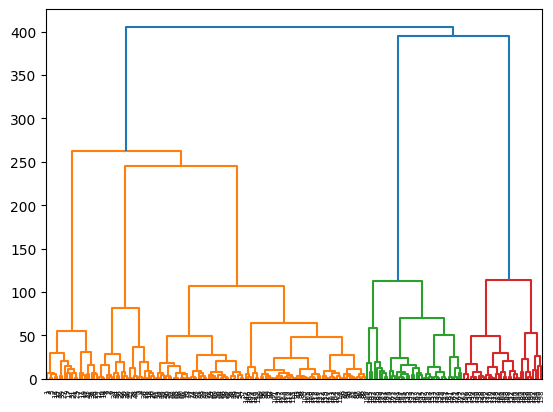

In [7]:
#   Optimal Clusters by Dendrogram -->

dendro = dendrogram(linkage(x_data, method='ward'))
plt.show()

In [11]:
#   Training the model -->

model = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_pred = model.fit_predict(x_data)
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

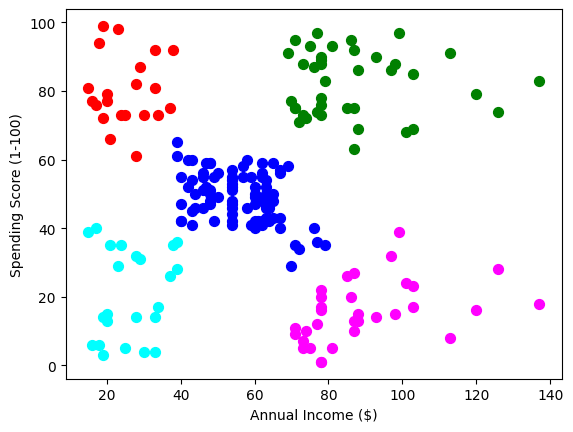

In [14]:
#   Visualizing The Clusters -->

plt.scatter(x_data[y_pred==0,0], x_data[y_pred==0,1], s=50, c='magenta')
plt.scatter(x_data[y_pred==1,0], x_data[y_pred==1,1], s=50, c='blue')
plt.scatter(x_data[y_pred==2,0], x_data[y_pred==2,1], s=50, c='green')
plt.scatter(x_data[y_pred==3,0], x_data[y_pred==3,1], s=50, c='red')
plt.scatter(x_data[y_pred==4,0], x_data[y_pred==4,1], s=50, c='cyan')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.show()